In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [21]:
import os
for dirname, _, filenames in os.walk('C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.gitattributes
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.gitignore
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\Heart Attack Prediction.ipynb
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\heart.csv
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\o2Saturation.csv
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\COMMIT_EDITMSG
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\config
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\description
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\FETCH_HEAD
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\HEAD
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\index
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\packed-refs
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\hooks\applypatch-msg.sample
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\hooks\commit-msg.sample
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA

In [7]:
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
df = pd.read_csv("C:/Users/anmol/UCDPA_Anmol Rattan/Heart Attack Prediction/heart.csv")

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

In [11]:
display(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
df["age"].mean()

54.366336633663366

In [15]:
df.isnull().sum() #missing value

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

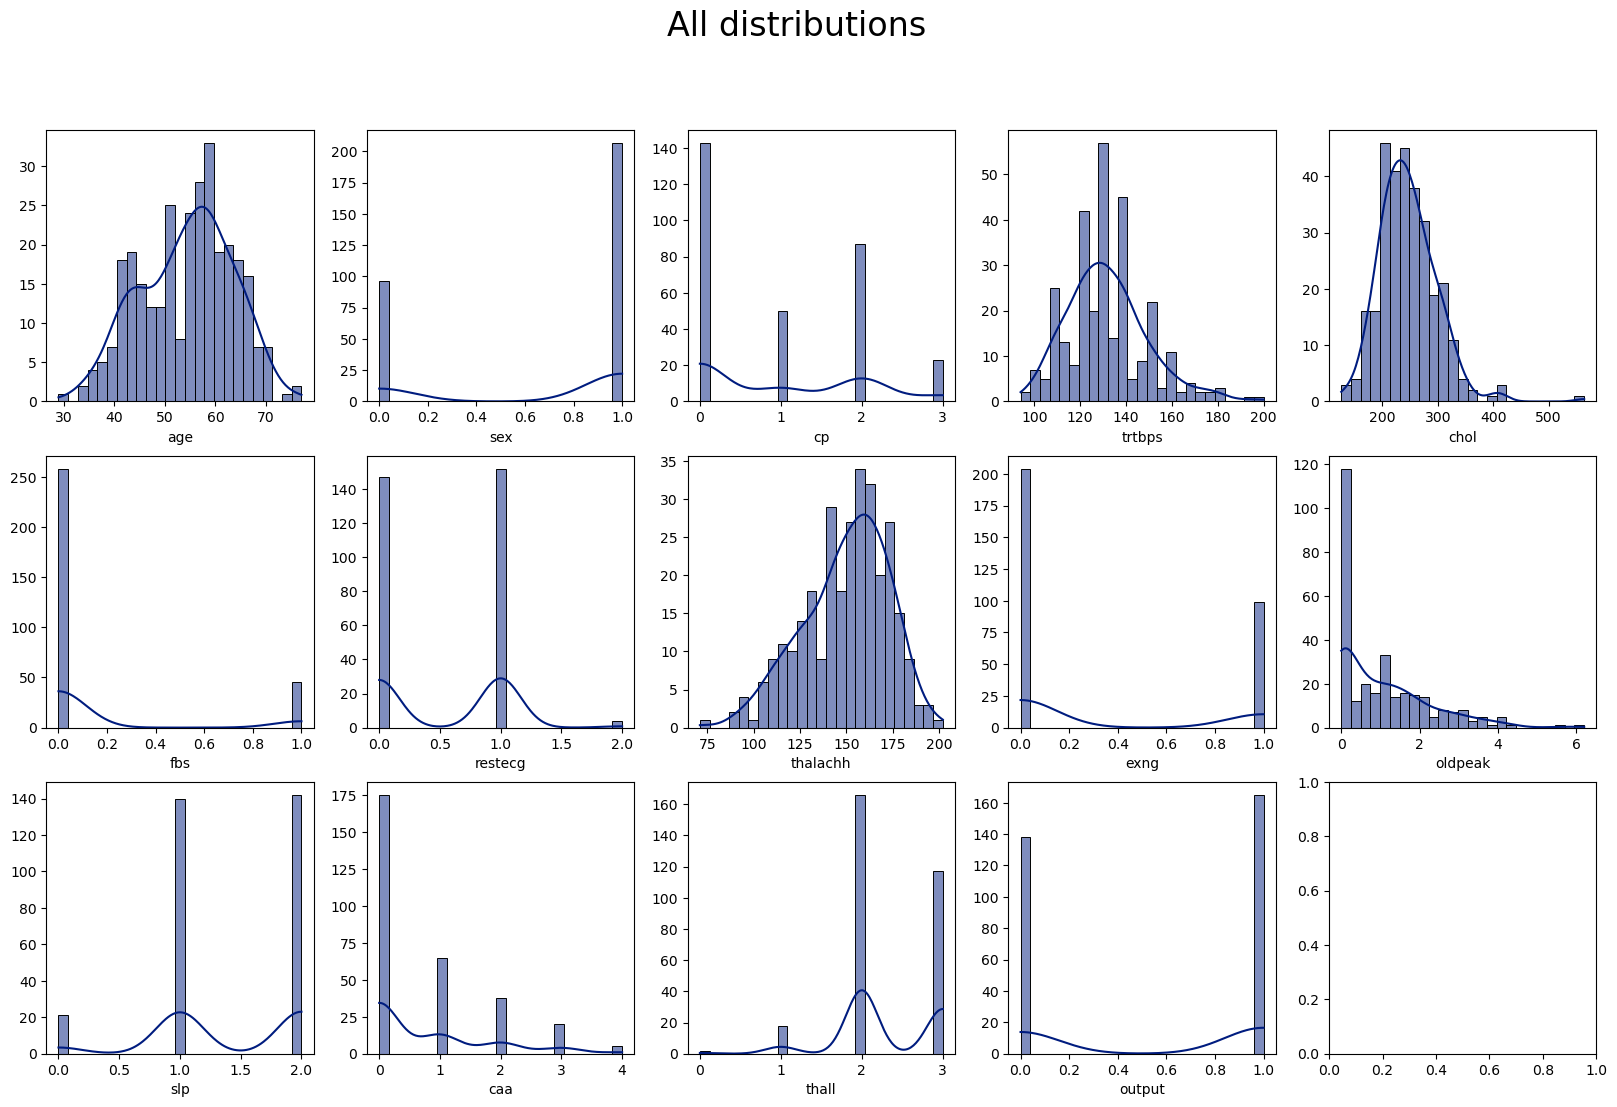

In [34]:
sns.set_palette("dark")
fig, axes = plt.subplots(3,5,figsize=(20,12))
axes = axes.flatten()
ax_no = 0
for col in df.columns:
    sns.histplot(data = df, x=col, bins=25, kde=True, ax = axes[ax_no])
    axes[ax_no].set_ylabel('')
    ax_no += 1
fig.suptitle('All distributions', fontsize = 24)
plt.show()

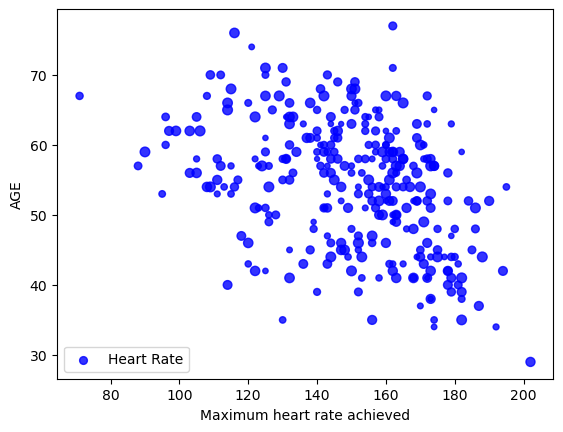

In [18]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = df['thalachh']
y = df['age']
s = np.random.rand(*x.shape) * 150 + 50

plt.scatter(x, y, s, c="b", alpha=0.8, marker=r'.',
            label="Heart Rate")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("AGE")
plt.legend(loc='lower left')
plt.show()

<Figure size 2000x1500 with 0 Axes>

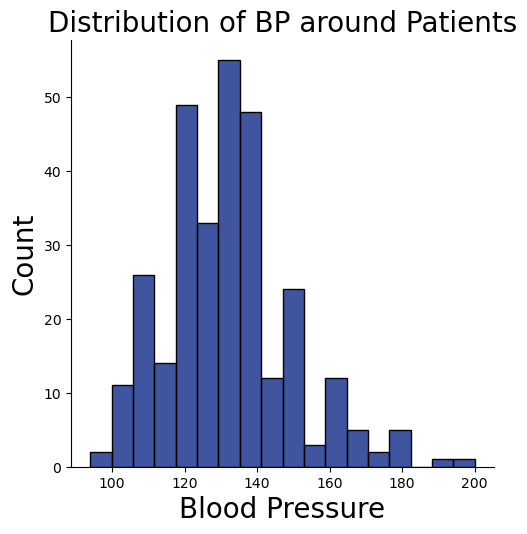

In [35]:
plt.figure(figsize=(20,15))
sns.displot(df["trtbps"])
plt.title("Distribution of BP around Patients", fontsize=20)
plt.xlabel("Blood Pressure", fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

1    164
0    134
Name: output, dtype: int64

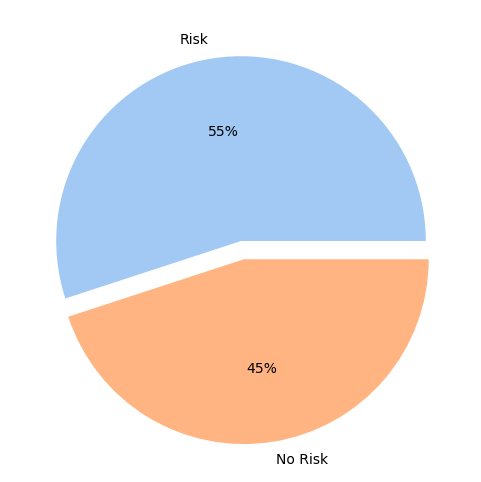

In [60]:
output_vc = df['output'].value_counts()
display(output_vc)

sns.set_palette("pastel")
plt.figure(figsize=(6,6))
plt.pie(x=output_vc, labels= ['Risk', 'No Risk'] , autopct='%.0f%%', explode= [0,0.1])
plt.show()

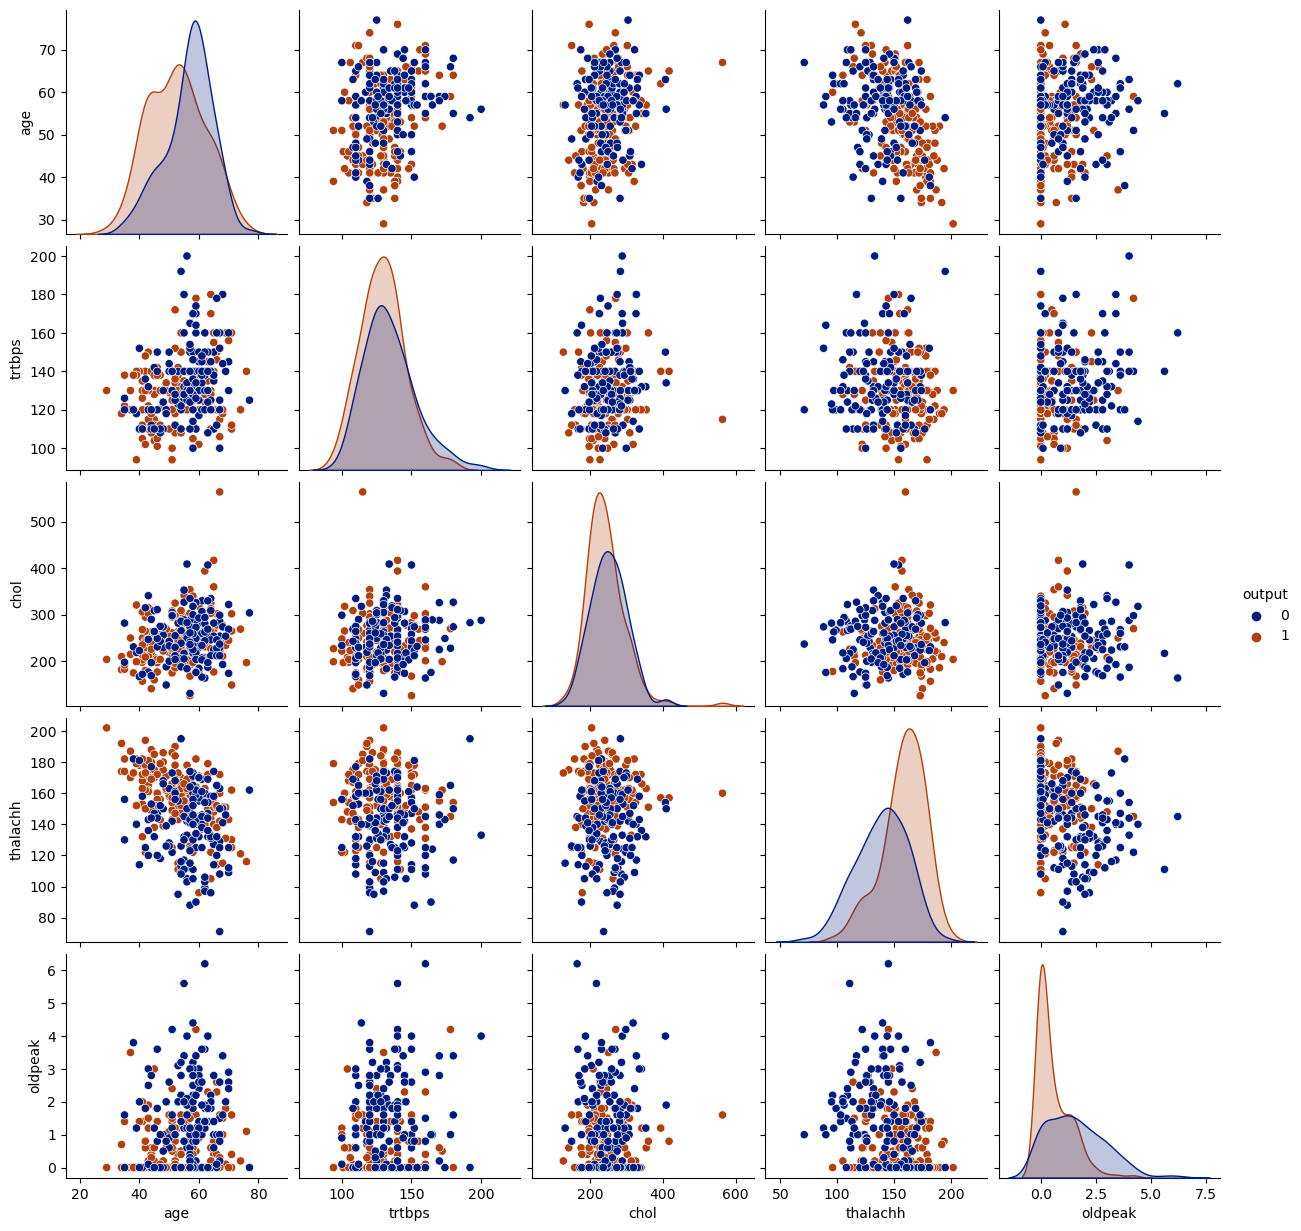

In [41]:
x_vars=['age','trtbps','chol','thalachh','oldpeak']
y_vars=['age','trtbps','chol','thalachh','oldpeak']

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue='output',palette='dark')

In [38]:
# correlation dataframe
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


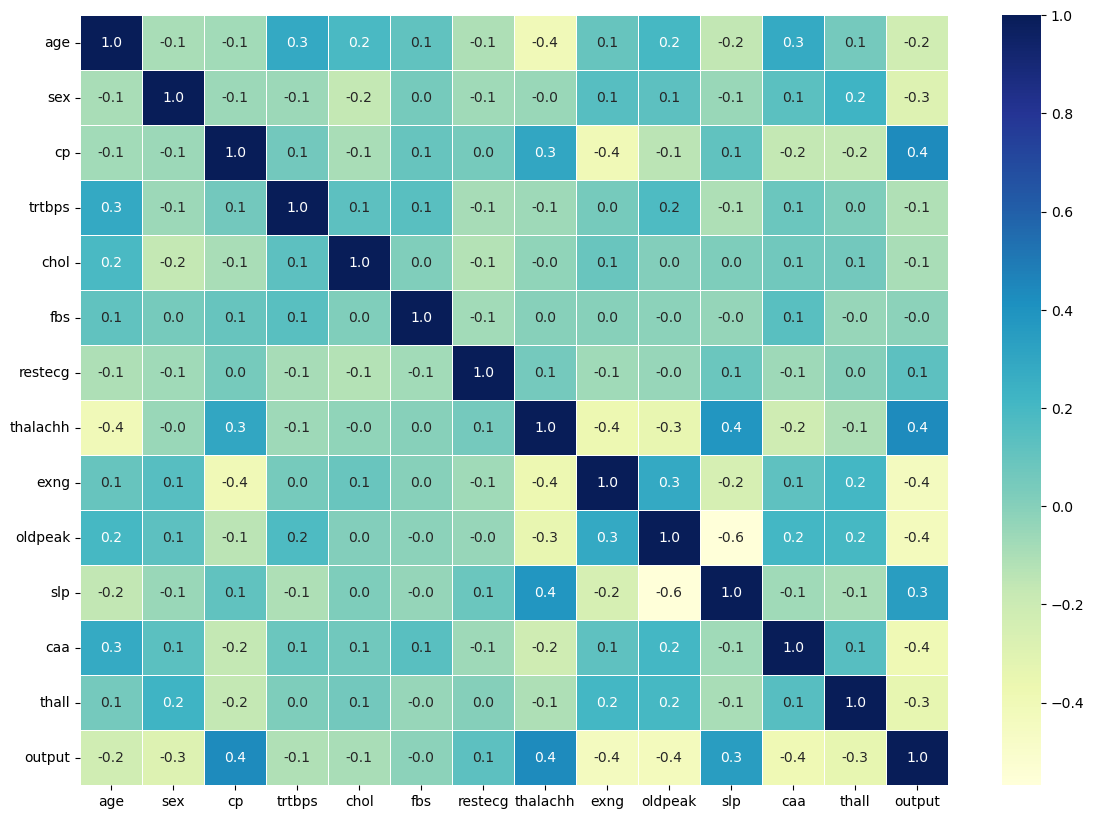

In [82]:
# visualize correlation dataframe(df.corr()) with heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7, cmap="YlGnBu")
plt.show()

In [47]:
numerical_list = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
df_numerical = df.loc[:, numerical_list]
df_numerical.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [49]:
# outlier detection
for i in numerical_list:
    # calculate IQR value
    Q1 = np.percentile(df.loc[:, i], 25)     # lower quartille
    Q3 = np.percentile(df.loc[:, i], 75)     # upper quartille
    IQR = Q3 - Q1
    
    # printing old shape... shape is going to change after drop outliers from dataframe
    print(f"Old shape: {df.loc[:, i].shape}")
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 + (IQR * 2.5)))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - (IQR * 2.5)))
    
    print(f"{i} --> {lower} - {upper}")
    
    # drop upper outliers
    try:
        df.drop(upper[0], inplace = True)
    except:
        print(f"KeyError: {upper[0]} not found in axis")
        
    # drop lower outliers
    try:
        df.drop(lower[0], inplace = True)
    except:
        print(f"KeyError: {lower[0]} not found in axis")
        
    # printing new shape
    print(f"New shape: {df.shape}")

Old shape: (303,)
age --> (array([], dtype=int64),) - (array([], dtype=int64),)
New shape: (303, 14)
Old shape: (303,)
trtbps --> (array([], dtype=int64),) - (array([223, 248], dtype=int64),)
New shape: (301, 14)
Old shape: (301,)
chol --> (array([], dtype=int64),) - (array([85], dtype=int64),)
New shape: (300, 14)
Old shape: (300,)
thalachh --> (array([], dtype=int64),) - (array([], dtype=int64),)
New shape: (300, 14)
Old shape: (300,)
oldpeak --> (array([], dtype=int64),) - (array([203, 220], dtype=int64),)
New shape: (298, 14)


In [62]:
continuous_cols = ['age','trtbps','chol','thalachh','oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng',  'slp', 'caa', 'thall']

Text(0.5, 0.98, 'Probability of Heart Diseases for each category')

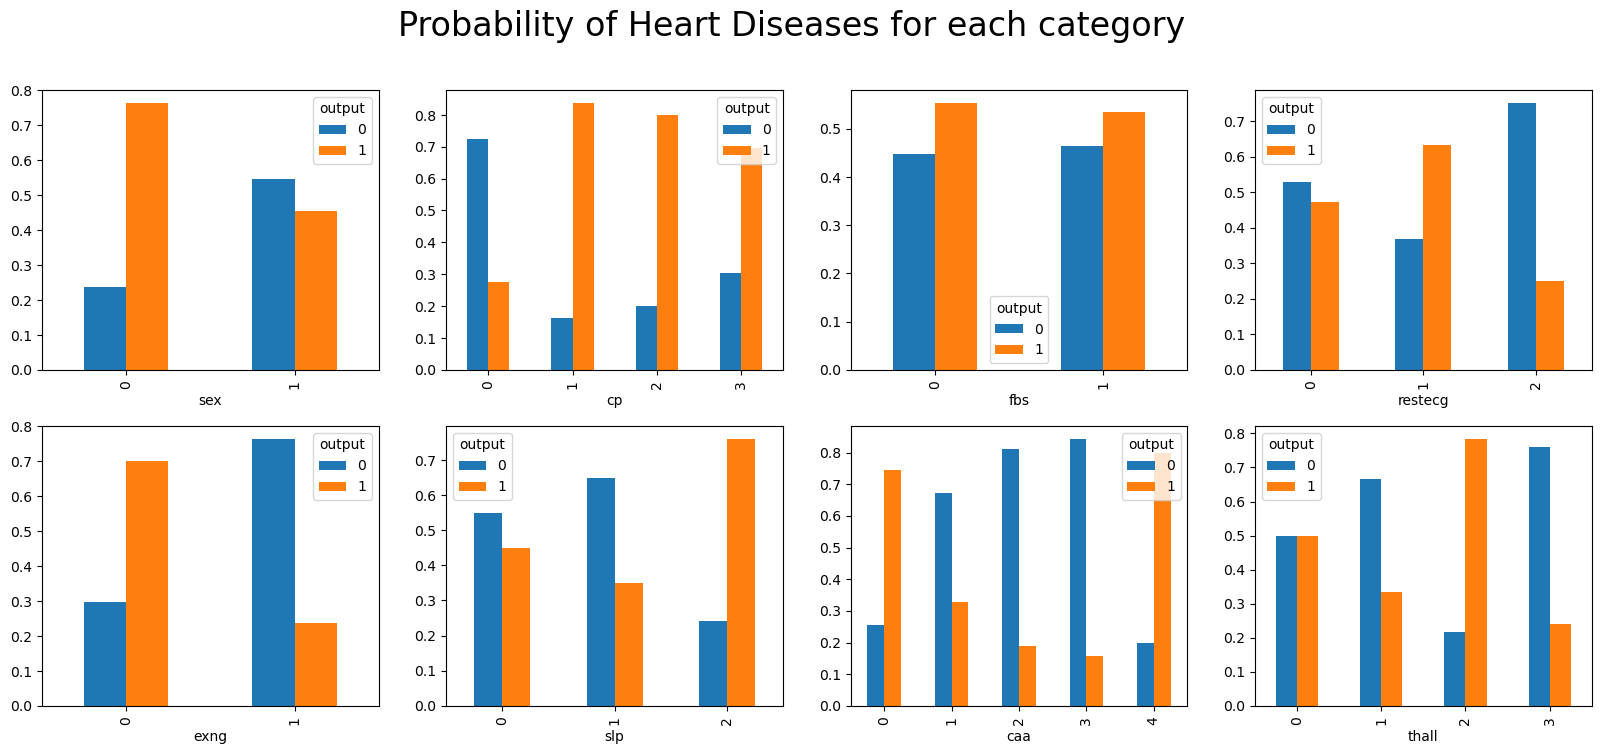

In [63]:
sns.set_palette('tab10')

fig, axes = plt.subplots(2,4,figsize=(20,8))
axes = axes.flatten()
for idx, col_name in enumerate(categorical_cols):
    crostabresult = pd.crosstab(index=df[col_name],columns=df['output'],normalize='index')
    crostabresult.plot(kind = 'bar',ax = axes[idx])
#     axes[idx].set_title(f'Probability of Heart Diseases for each {col_name}.')
fig.suptitle('Probability of Heart Diseases for each category', fontsize = 24)

Text(0.5, 0.98, 'Major Correlations among features')

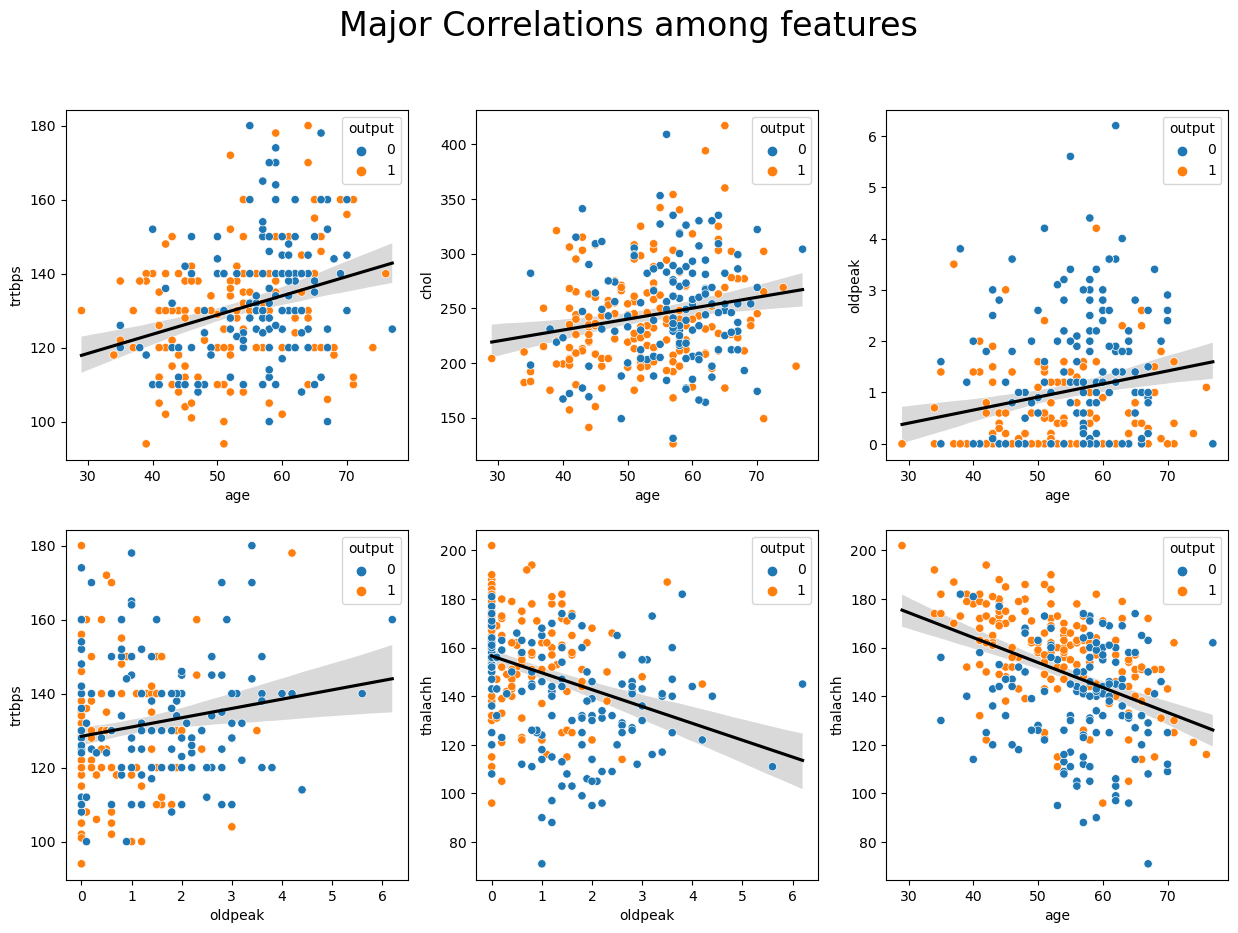

In [65]:
unique_pairs = [('age','trtbps'),('age','chol'),('age','oldpeak'),
    ('oldpeak','trtbps'),('oldpeak', 'thalachh'),('age','thalachh')]

fig, axes = plt.subplots(2,3, figsize=(15, 10))
axes = axes.flatten()
for i in range(6):
    sns.regplot(data= df, x= unique_pairs[i][0], y= unique_pairs[i][1], ax = axes[i], scatter = False, color='black', ci=95)
    sns.scatterplot(data= df, x= unique_pairs[i][0], y= unique_pairs[i][1], hue='output', ax = axes[i])
    
fig.suptitle('Major Correlations among features', fontsize = 24)

In [50]:
x=df.iloc[:, 1:-1].values 
y=df.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [52]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [53]:
x_train, x_test

(array([[ 0.67172875, -0.96263814, -1.22565003, ..., -0.65743451,
          0.26650194,  1.17394078],
        [ 0.67172875, -0.00402777, -0.16146585, ...,  0.95565222,
         -0.6945202 , -0.44107601],
        [-1.48869615, -0.96263814, -1.22565003, ...,  0.95565222,
         -0.6945202 , -0.44107601],
        ...,
        [-1.48869615, -0.00402777, -1.52125675, ...,  0.95565222,
         -0.6945202 , -0.44107601],
        [ 0.67172875,  0.95458259,  0.42974758, ...,  0.95565222,
         -0.6945202 , -0.44107601],
        [ 0.67172875,  0.95458259,  0.07501952, ...,  0.95565222,
          1.22752408,  1.17394078]]),
 array([[-1.46897745e+00,  1.21425192e+00,  5.24679734e-01,
          1.49429932e+00, -3.63421892e-01,  8.20552724e-01,
         -6.06437199e-01, -8.16496581e-01, -7.25465762e-01,
          1.02899151e+00, -7.83633652e-01,  1.04816731e+00],
        [ 6.80745646e-01, -8.38004845e-01, -1.01915402e+00,
         -3.77333128e-01,  2.75162290e+00,  8.20552724e-01,
          5.

In [54]:
model=LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print("Confusion Matrix:", conf)
print("The Accuracy of LR is: ", accuracy_score(y_test, predicted)*100)

Confusion Matrix: [[23 10]
 [ 1 26]]
The Accuracy of LR is:  81.66666666666667


In [55]:
model= SVC()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
print("The Accuracy of SVM is: ", accuracy_score(y_test, predicted)*100)

The Accuracy of SVM is:  83.33333333333334


In [72]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {}
models['RF'] = RandomForestClassifier(random_state=0)
models['LR'] = LogisticRegression(random_state=0)
models['SGDC'] = SGDClassifier(random_state=0)
models['ADA'] = AdaBoostClassifier(random_state=0)
models['SVC'] = SVC(random_state=0)
models['GBC'] = GradientBoostingClassifier(random_state=0)
models['KNN'] = KNeighborsClassifier()


model_score = {}
y_preds = {}

for model_name in models.keys():
    models[model_name].fit(x_train,y_train)
    y_preds[model_name] = models[model_name].predict(x_test)
    model_score[model_name] = accuracy_score(y_test, y_preds[model_name])
#     print(f"Accuracy score of {model_name} is {model_score[model_name]}")

model_score = dict(sorted(model_score.items(), key=lambda x: x[1], reverse=True))
model_score

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'SVC': 0.8333333333333334,
 'RF': 0.8166666666666667,
 'LR': 0.8166666666666667,
 'SGDC': 0.8166666666666667,
 'KNN': 0.8166666666666667,
 'ADA': 0.8,
 'GBC': 0.7833333333333333}

Text(0.5, 1.0, 'Accuracy scores of different models')

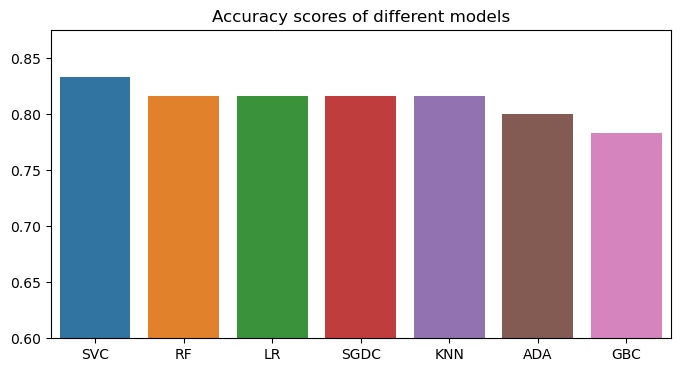

In [73]:
fig, axes = plt.subplots(figsize=(8,4))
sns.barplot(y = list(model_score.values()), x= list(model_score.keys()), ax = axes)
axes.set_ylim(0.6,)
axes.set_title("Accuracy scores of different models")

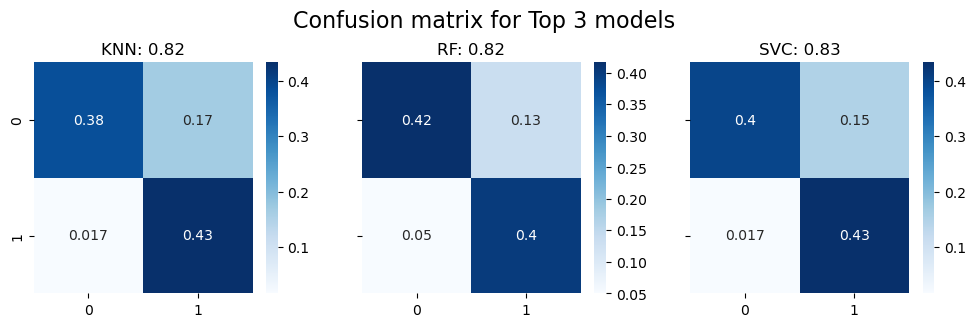

In [74]:
fig, ax = plt.subplots(1,3, figsize=(12,3), sharey=True)

mtx = confusion_matrix(y_test,y_preds['KNN'], normalize='all')
sns.heatmap(mtx, annot=True, cmap='Blues', ax = ax[0])
ax[0].set_title("KNN: %.2f"%(model_score['KNN']))

mtx = confusion_matrix(y_test,y_preds['RF'], normalize='all')
sns.heatmap(mtx, annot=True, cmap='Blues', ax = ax[1])
ax[1].set_title("RF: %.2f"%(model_score['RF']))


mtx = confusion_matrix(y_test,y_preds['SVC'], normalize='all')
sns.heatmap(mtx, annot=True, cmap='Blues', ax = ax[2])
ax[2].set_title("SVC: %.2f"%(model_score['SVC']))

fig.suptitle('Confusion matrix for Top 3 models', fontsize = 16, va='bottom')
plt.show()

NameError: name 'auc' is not defined

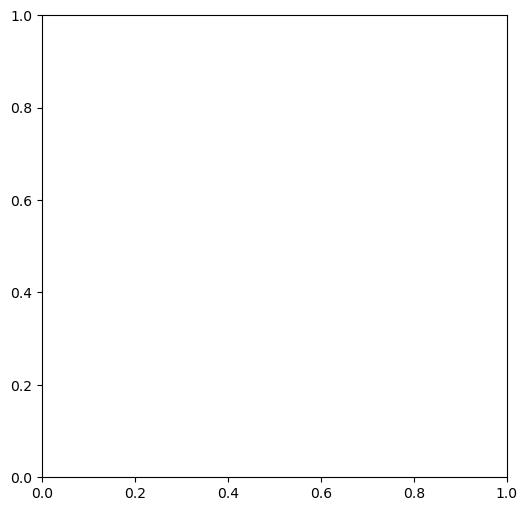

In [107]:
fig, ax = plt.subplots(figsize=(6,6))

for model_name in ['KNN', 'RF', 'SVC']: 
    fpr, tpr, threshold = roc_curve(y_test,y_preds[model_name])
    auc_area = auc(fpr, tpr)
    ax.plot(fpr, tpr, label= f'{model_name} model. AUC: {round(auc_area,2)}')

ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
fig.suptitle('ROC Curve for Top 3 models', fontsize = 16, va='bottom')
plt.legend(loc = 3)
plt.plot()

In [84]:
#ROC curve

models = {"KNN","RF","SVC"}

for name, model in models.items():
            model_probs = model.predict_proba(x_test)[:, 1]
        
            model_auc_score = roc_auc_score(y_test, model_probs)
            
            yhat = model.predict(x_test)
            
            fpr, tpr, _ = roc_curve(y_test, model_probs)
            
            precision, recall, _ = precision_recall_curve(y_test, model_probs)
            
            model_f1, model_auc_PR = f1_score(y_test, yhat), auc(recall, precision)
            
            plt.plot(fpr, tpr, label=f"{name}, auc = {model_auc_score:.3f}")
            
            
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.show()

AttributeError: 'set' object has no attribute 'items'

In [88]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


In [89]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.571429,0.75,-0.112903,-0.076336,0.96875,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.285714,0.00,0.161290,1.053435,1.71875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.000000,0.00,-0.580645,0.595420,0.40625,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.071429,-0.50,-0.064516,0.778626,0.03125,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.142857,-0.50,1.838710,0.320611,-0.09375,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (238, 22)
The shape of X_test is        (60, 22)
The shape of y_train is       (238, 1)
The shape of y_test is        (60, 1)


In [91]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.85


C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

The best params are : {'C': 5, 'gamma': 0.01}
The best score is   : 0.823581560283688
The test accuracy score of SVM after hyper-parameter tuning is  0.8833333333333333


C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9166666666666666


C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


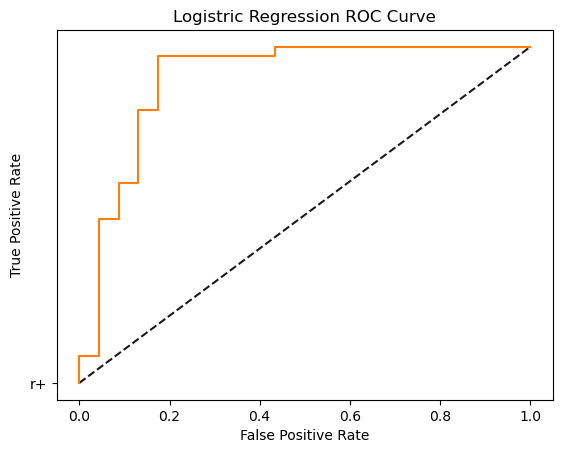

In [94]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

In [95]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7333333333333333


In [96]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7333333333333333


C:\Users\anmol\AppData\Local\Temp\ipykernel_26620\2557211455.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [97]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test accuracy score of Gradient Boosting Classifier is  0.8666666666666667


Text(0.5, 1.0, 'Accuracy scores of different models')

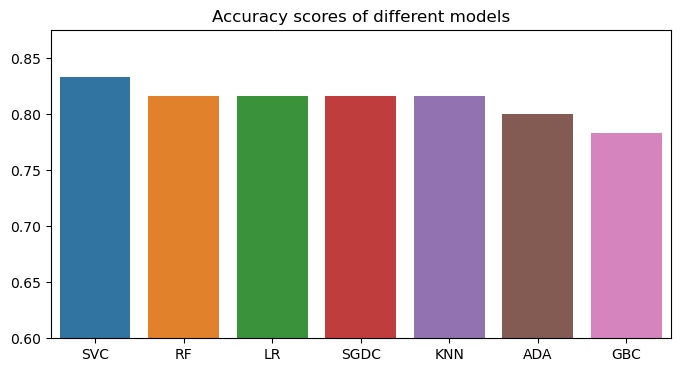

In [98]:
fig, axes = plt.subplots(figsize=(8,4))
sns.barplot(y = list(model_score.values()), x= list(model_score.keys()), ax = axes)
axes.set_ylim(0.6,)
axes.set_title("Accuracy scores of different models")

In [99]:
#spliting data into X and y

X=df.drop(["output"],axis=1)
y=df["output"]

In [100]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

In [102]:
#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [103]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [104]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pre=ada.predict(X_test)
acc_ada = accuracy_score(y_test,ada_pre)
acc_ada

0.7166666666666667

In [106]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

AttributeError: 'set' object has no attribute 'items'